## Correlation of COVID-19 cases in the states of Mexico by Community Mobility

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Import COVID-19 cases data

In [2]:
dfcvcasest = pd.read_csv('../Data/week1analyzes2020.csv')
#dfcvcasest['cve_ent'] = dfcvcasest['cve_ent'].astype('str')
dfcvcasest

,state,population,total_cases,cases_rates,total_cases_2020,cases_rate_2020,total_deaths,deaths_rates,total_deaths_2020,deaths_rate_2020
0,AGUASCALIENTES,1434635,26695,1860.752038,1105,77.023076,2456,171.193370,1718,119.751714
1,BAJA CALIFORNIA,3634868,50286,1383.434006,6768,186.196583,8648,237.917856,7261,199.759661
2,BAJA CALIFORNIA SUR,804708,36317,4513.065609,746,92.704434,1486,184.663257,941,116.936827
3,CAMPECHE,1000617,11099,1109.215614,791,79.051225,1266,126.521936,1063,106.234453
4,CHIAPAS,5730367,12063,210.510077,2522,44.011143,1655,28.881222,1377,24.029875
5,CHIHUAHUA,3801487,57486,1512.197727,3580,94.173675,7493,197.107079,5961,156.807060
6,COAHUILA,3218720,69397,2156.043396,1836,57.041308,6376,198.091167,5112,158.820898
7,COLIMA,785153,12208,1554.856187,202,25.727470,1210,154.110091,873,111.188520
8,DISTRITO FEDERAL,9018645,673666,7469.703043,35071,388.872164,34461,382.108399,23613,261.824254
9,DURANGO,1868996,34588,1850.619263,599,32.049293,2495,133.494133,1928,103.156989


#### Import Community Mobility Reports by States.

##### Source: [https://www.google.com/covid19/mobility/?hl=en]  Region CSVs --> Region_Mobility_Report_CSVs.zip

##### Decompress <Region_Mobility_Report_CSVs.zip> and copy <2020_MX_Region_Mobility_Report.csv> on Data Directory of Jupyter

In [3]:
dfmob = pd.read_csv('../Data/2020_MX_Region_Mobility_Report2.csv')
dfmob

,state,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AGUASCALIENTES,-4,29,-21,-7,-9,5
1,BAJA CALIFORNIA,2,36,2,14,-1,2
2,BAJA CALIFORNIA SUR,-13,13,-21,11,-12,6
3,CAMPECHE,-19,20,-37,-16,-10,10
4,CHIAPAS,4,26,-24,-14,-4,4
5,CHIHUAHUA,4,34,0,0,-2,2
6,COAHUILA,6,28,-13,9,-3,3
7,COLIMA,-5,17,-14,9,-3,2
8,DISTRITO FEDERAL,-24,16,-27,-20,-24,13
9,DURANGO,6,36,2,47,-2,2


In [4]:
dfAll= pd.merge(dfcvcasest, dfmob, on='state', how='outer')
dfAll

,state,population,total_cases,cases_rates,total_cases_2020,cases_rate_2020,total_deaths,deaths_rates,total_deaths_2020,deaths_rate_2020,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AGUASCALIENTES,1434635,26695,1860.752038,1105,77.023076,2456,171.193370,1718,119.751714,-4,29,-21,-7,-9,5
1,BAJA CALIFORNIA,3634868,50286,1383.434006,6768,186.196583,8648,237.917856,7261,199.759661,2,36,2,14,-1,2
2,BAJA CALIFORNIA SUR,804708,36317,4513.065609,746,92.704434,1486,184.663257,941,116.936827,-13,13,-21,11,-12,6
3,CAMPECHE,1000617,11099,1109.215614,791,79.051225,1266,126.521936,1063,106.234453,-19,20,-37,-16,-10,10
4,CHIAPAS,5730367,12063,210.510077,2522,44.011143,1655,28.881222,1377,24.029875,4,26,-24,-14,-4,4
5,CHIHUAHUA,3801487,57486,1512.197727,3580,94.173675,7493,197.107079,5961,156.807060,4,34,0,0,-2,2
6,COAHUILA,3218720,69397,2156.043396,1836,57.041308,6376,198.091167,5112,158.820898,6,28,-13,9,-3,3
7,COLIMA,785153,12208,1554.856187,202,25.727470,1210,154.110091,873,111.188520,-5,17,-14,9,-3,2
8,DISTRITO FEDERAL,9018645,673666,7469.703043,35071,388.872164,34461,382.108399,23613,261.824254,-24,16,-27,-20,-24,13
9,DURANGO,1868996,34588,1850.619263,599,32.049293,2495,133.494133,1928,103.156989,6,36,2,47,-2,2


<AxesSubplot:>

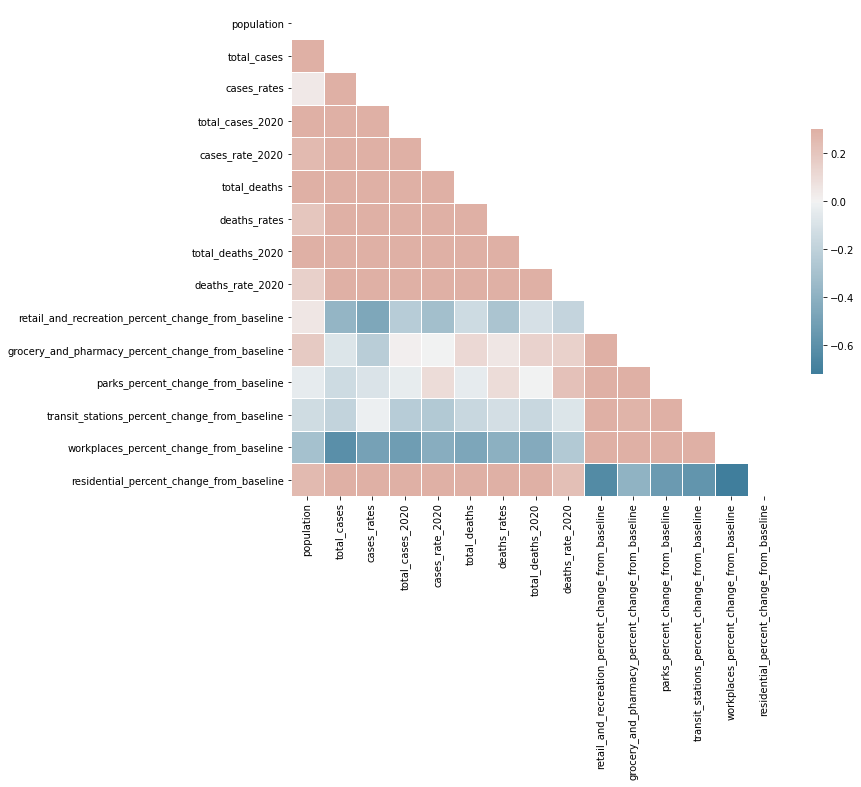

In [5]:
# Compute the correlation matrix
corr = dfAll.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 720x504 with 0 Axes>

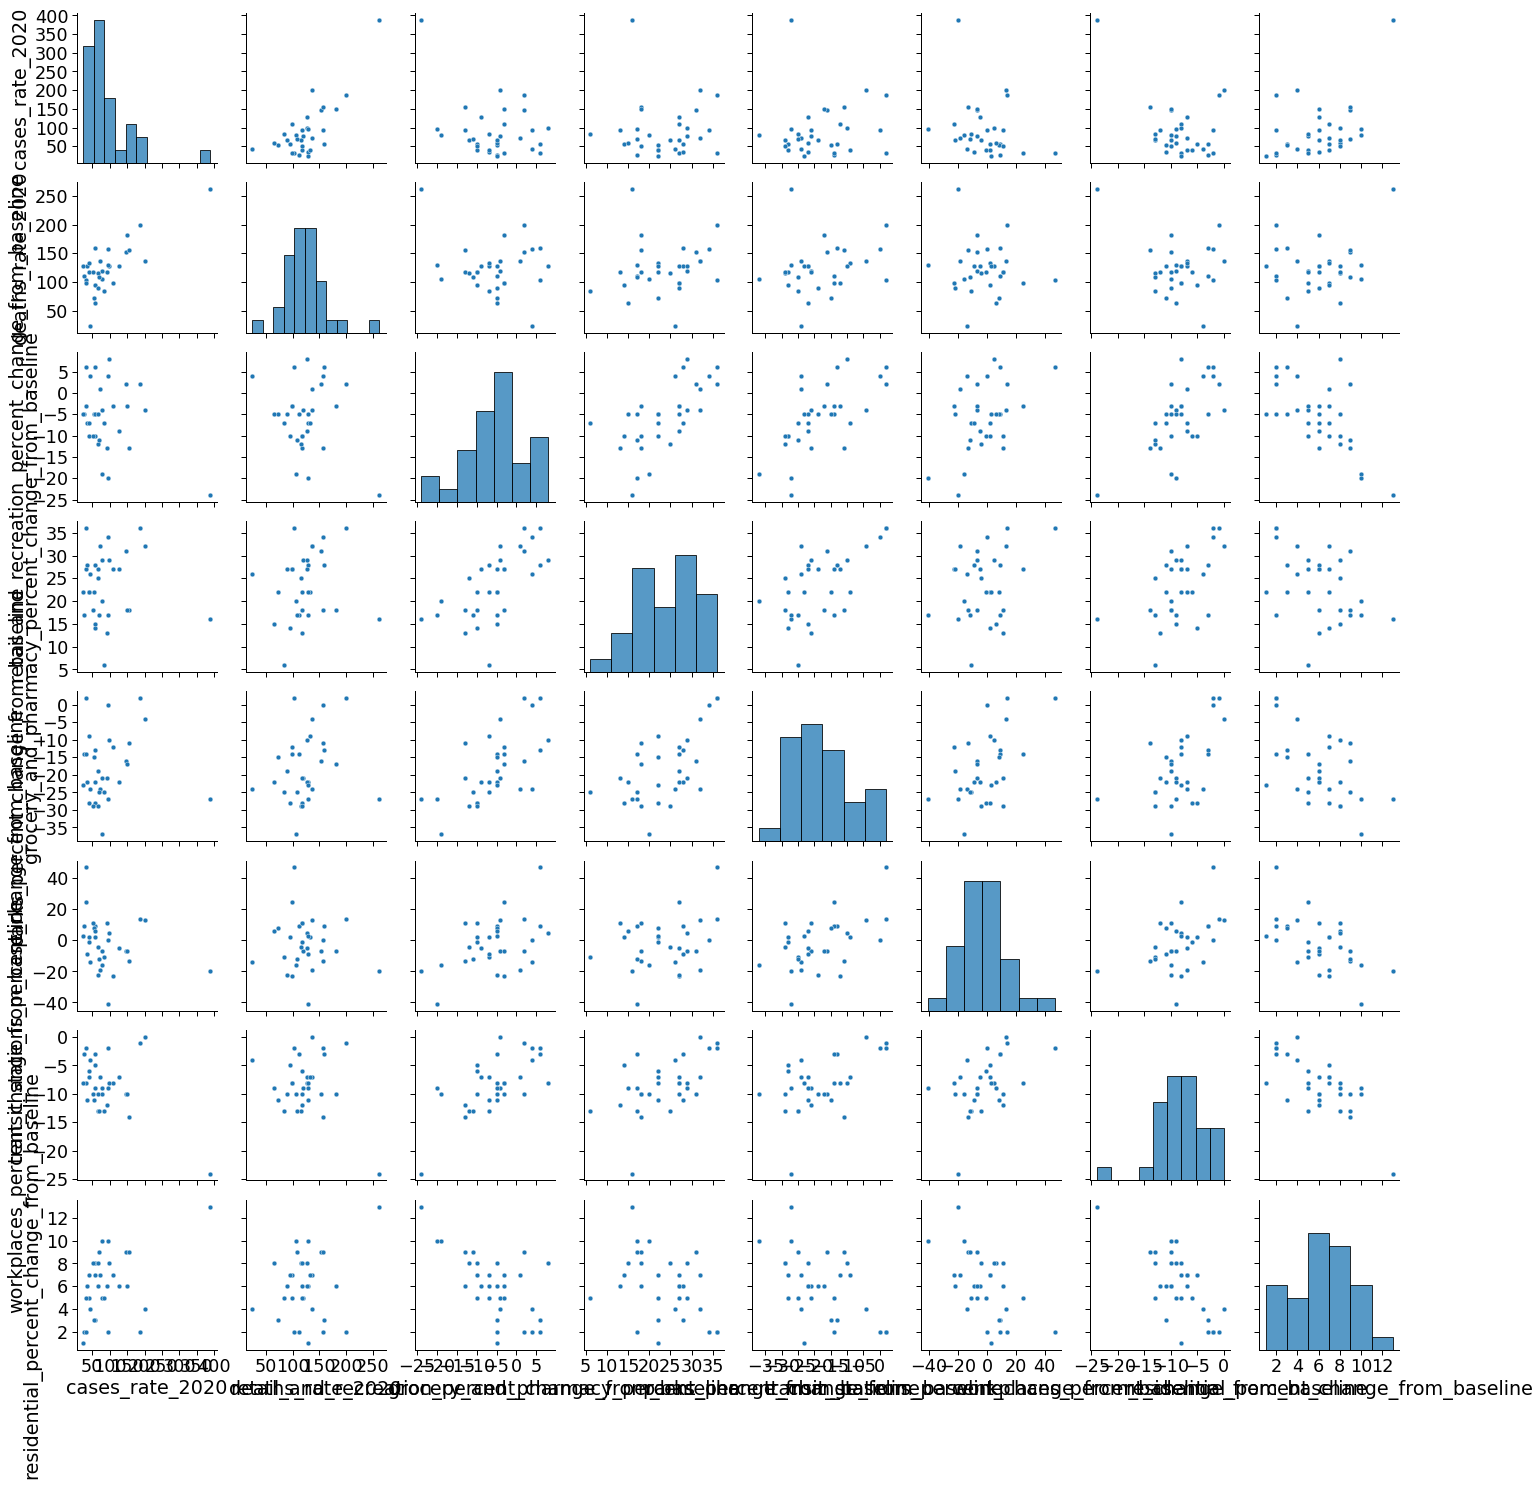

In [8]:
dfpairc=dfAll[["cases_rate_2020", "deaths_rate_2020", "retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]
plt.figure(figsize=(10,7))
sns.pairplot(dfpairc)
sns.set_context('paper', font_scale=0.5)

##### By using de "query"  method, just the Total of each Municipalitye are considered

dfvar.query("NOM_LOC == 'Total del Municipio'", inplace = True)
dfvar

##### By using dictionary, some columns of interest of the dataframe are selected

dfvar=dfvar[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','PCON_DISC','PCON_LIMI','PCLIM_PMEN','GRAPROES','PSINDER','PDER_SS','PROM_OCUP']].copy()

dfvar.rename(columns = {'MUN':'municipalitie_number', 'NOM_MUN': 'municipalities','PCON_DISC': 'population_disability','PCON_LIMI': 'population_limitation','PCLIM_PMEN': 'population_mental_problem','GRAPROES': 'average_years_finish', 'PSINDER': 'no_med_afilation', 'PDER_SS': 'med_afilation', 'PROM_OCUP': 'average_household_size'}, inplace=True)

dfvar['mun_num'] = dfvar['municipalitie_number'].apply(lambda i: f'{i:03d}')
dfvar['ENTIDAD'] = dfvar['ENTIDAD'].astype(str)
dfvar['cve_ent'] = dfvar['ENTIDAD'] + dfvar['mun_num']

dfvar['population_disability'] = dfvar['population_disability'].astype(int)
dfvar['population_limitation'] = dfvar['population_limitation'].astype(int)
dfvar['population_mental_problem'] = dfvar['population_mental_problem'].astype(int)
dfvar['average_years_finish'] = dfvar['average_years_finish'].astype(float)
dfvar['no_med_afilation'] = dfvar['no_med_afilation'].astype(int)
dfvar['med_afilation'] = dfvar['med_afilation'].astype(int)
dfvar['average_household_size'] = dfvar['average_household_size'].astype(float)

dfAll = pd.merge(dfvar,dfcvcasesmcp,on=['cve_ent'])
dfAll

dfAll = dfAll[['population','population_disability', 'population_limitation',
       'population_mental_problem', 'average_years_finish', 'no_med_afilation',
       'med_afilation', 'average_household_size', 'cases_rate', 
       'cases_rate_last_60_days', 'deaths_rate',
       'deaths_rate_last_60_days']].copy()
dfAll['pct_disability']=dfAll['population_disability']/dfAll['population']*100
dfAll['pct_limitation']=dfAll['population_limitation']/dfAll['population']*100
dfAll['pct_mental_problem']=dfAll['population_mental_problem']/dfAll['population']*100
dfAll['pct_no_med_afilation']=dfAll['no_med_afilation']/dfAll['population']*100
dfAll['pct_med_afilation']=dfAll['med_afilation']/dfAll['population']*100

dfFinal = dfAll[['cases_rate','cases_rate_last_60_days', 'deaths_rate',
        'deaths_rate_last_60_days','population','pct_disability',
        'pct_limitation','pct_mental_problem', 'average_years_finish',
        'pct_no_med_afilation','pct_med_afilation', 'average_household_size']].copy()

sns.pairplot(dfFinal)

corr = dfFinal.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set_context('paper', font_scale=0.5)